# EDA on Diatrend dataset

## Glucose Dataset

This dataset head shows glucose readings for Subject 1. It starts at around 160 and slightly rising. Other metrics, like carbInput and recommendations, are mostly missing (NaN), which is possibly due to incomplete entries or specific conditions not being met.

## Loading Data and Merging Sheets

In [1]:
import pandas as pd
import glob
import os
import re

# Set the path to the dataset folder and define the file pattern
file_pattern = os.path.join('..', 'glucosedataset', 'Subject*.xlsx')

# Get a list of all files that match the pattern
file_list = glob.glob(file_pattern)

# List to collect data from each subject file
data_frames = []

for file in file_list:
    # Extract the subject ID from the file name
    subject_id_match = re.search(r'Subject(\d+)\.xlsx', os.path.basename(file))
    if subject_id_match:
        subject_id = subject_id_match.group(1)
    else:
        print(f"Could not extract subject ID for file: {file}")
        continue
    
    # Load the 'CGM' and 'Bolus' sheets from the Excel file
    cgm_data = pd.read_excel(file, sheet_name='CGM')
    bolus_data = pd.read_excel(file, sheet_name='Bolus')
    
    # Add the Subject ID as a new column in both DataFrames
    cgm_data['Subject'] = subject_id
    bolus_data['Subject'] = subject_id
    
    # Merge CGM and Bolus data on 'date' and 'Subject' columns
    combined_data = pd.merge(cgm_data, bolus_data, how='outer', on=['date', 'Subject'], suffixes=('_cgm', '_bolus'))
    
    # Add this subject's combined data to our list
    data_frames.append(combined_data)

# Concatenate all subjects' data into a single DataFrame
all_data = pd.concat(data_frames, ignore_index=True)

# Show the first few rows of the merged data
print("Preview of combined data:")
print(all_data.head())


Could not extract subject ID for file: ..\glucosedataset\SubjectDemographics.xlsx
Preview of combined data:
                     date  mg/dl Subject  normal  carbInput  insulinCarbRatio  \
0 2015-12-01 21:01:07.925  160.0       1     NaN        NaN               NaN   
1 2015-12-01 21:06:07.043  161.0       1     NaN        NaN               NaN   
2 2015-12-01 21:11:08.277  165.0       1     NaN        NaN               NaN   
3 2015-12-01 21:16:08.223  162.0       1     NaN        NaN               NaN   
4 2015-12-01 21:21:07.953  163.0       1     NaN        NaN               NaN   

   bgInput  recommended.carb  recommended.net  recommended.correction  \
0      NaN               NaN              NaN                     NaN   
1      NaN               NaN              NaN                     NaN   
2      NaN               NaN              NaN                     NaN   
3      NaN               NaN              NaN                     NaN   
4      NaN               NaN            

### Plot for subject 1

C:\Users\eterp\AppData\Local\Temp\ipykernel_34856\2791005650.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', num_vars)


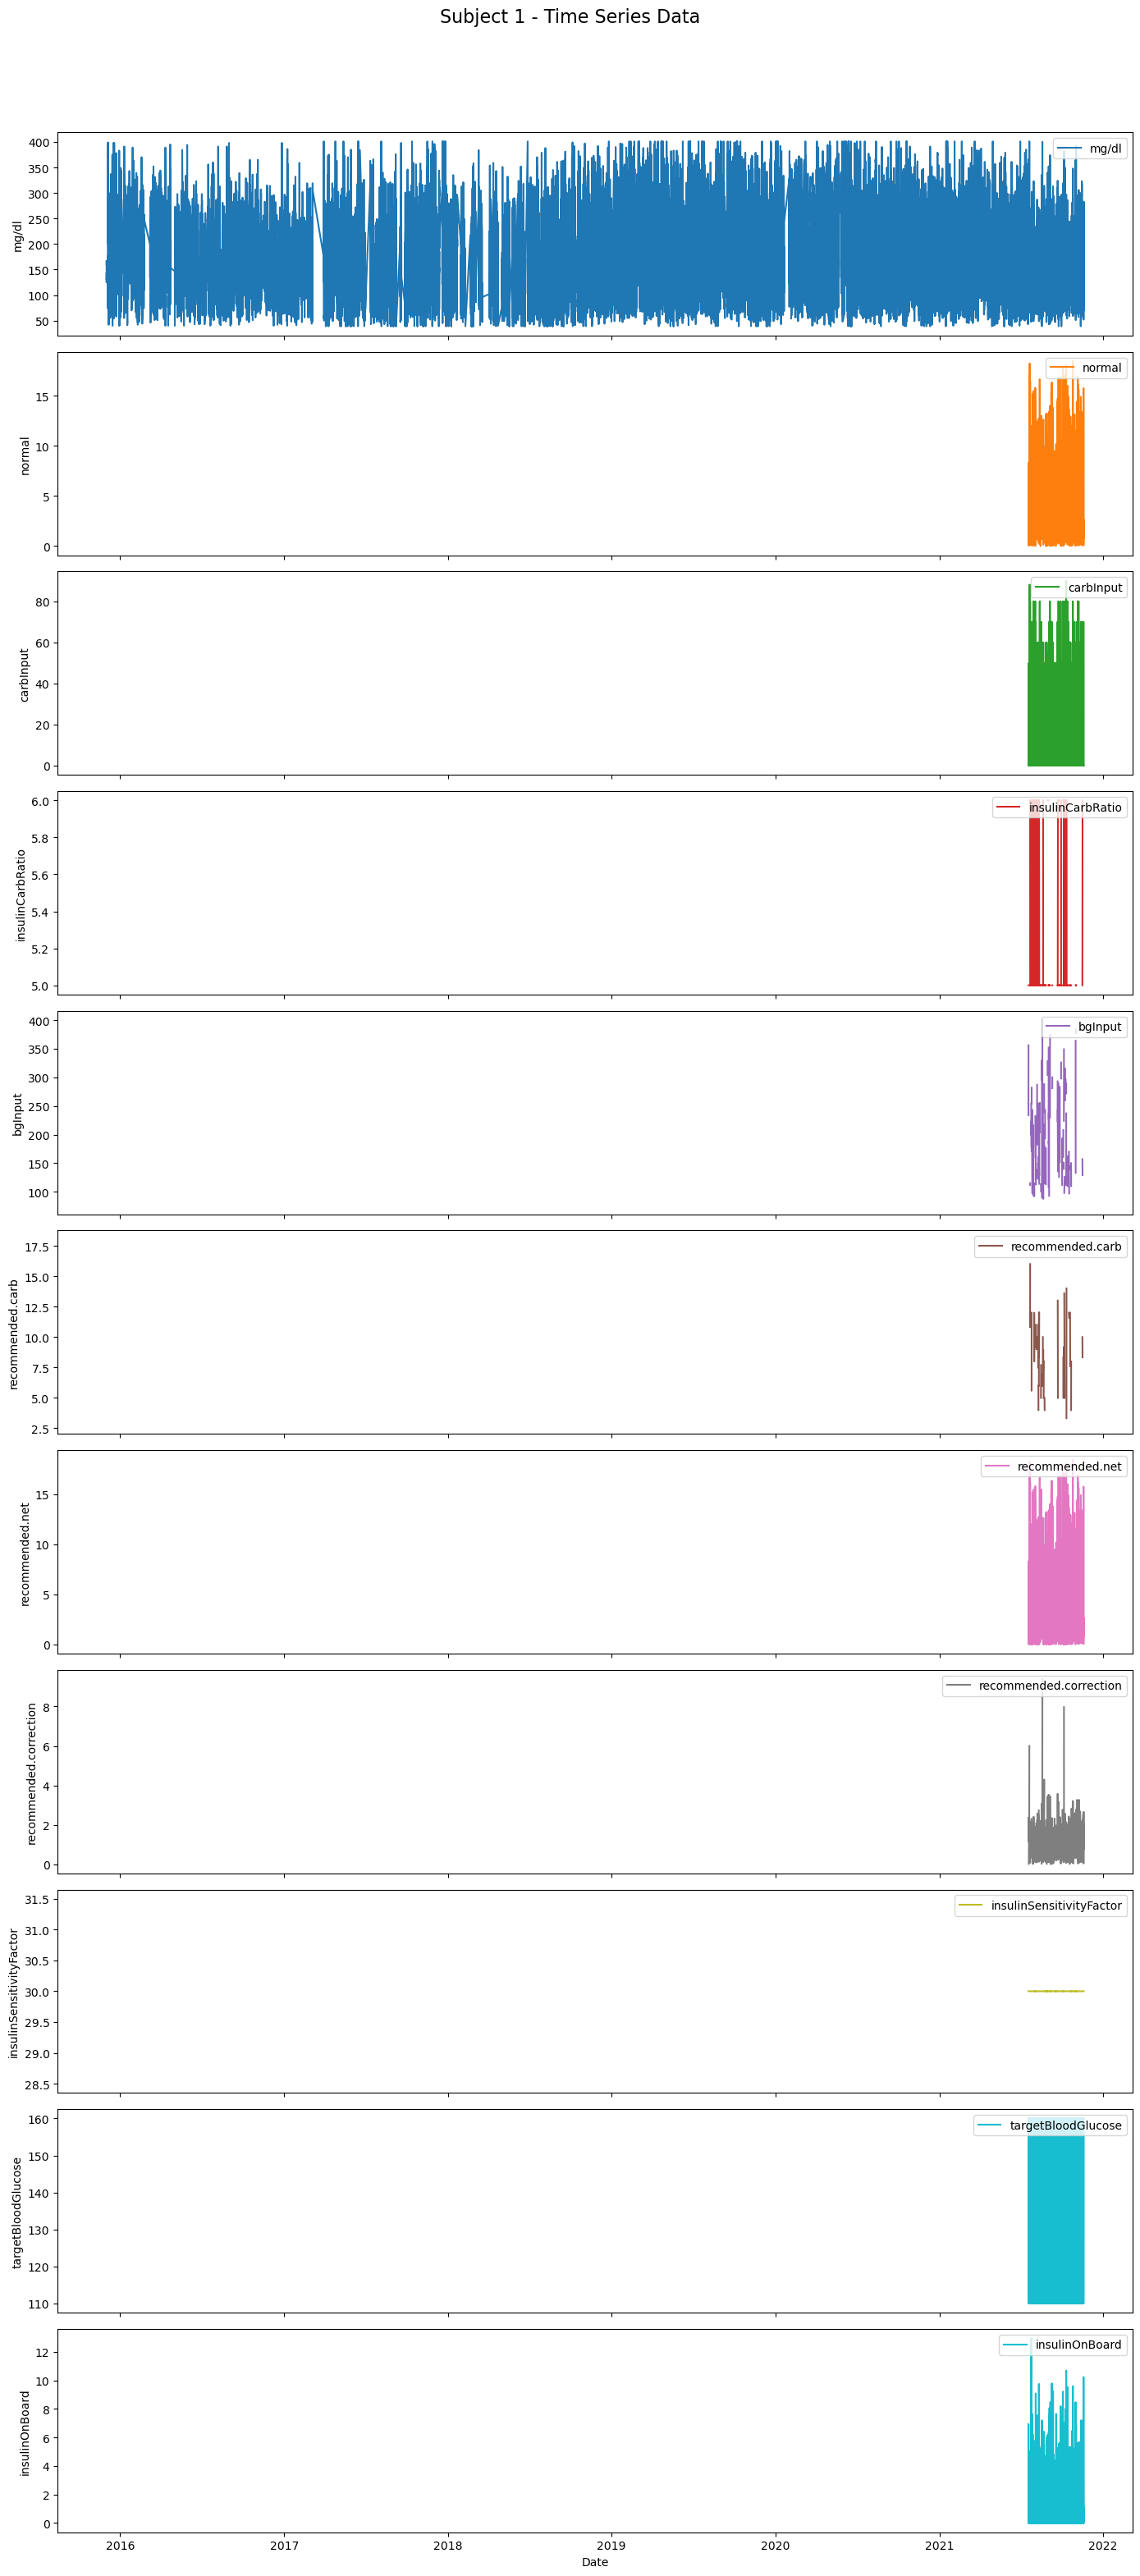

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Filter data for Subject 1
subject_1_data = all_data[all_data['Subject'] == '1']

# List of variables to plot, excluding 'date' and 'Subject'
variables_to_plot = [col for col in subject_1_data.columns if col not in ['date', 'Subject']]
num_vars = len(variables_to_plot)

# Set up the figure with a grid of subplots for each variable
fig, axes = plt.subplots(num_vars, 1, figsize=(14, num_vars * 3), sharex=True)
fig.suptitle("Subject 1 - Time Series Data", fontsize=16)

# Generate a colormap for the variables
colors = cm.get_cmap('tab10', num_vars)

# Plot each variable in a separate subplot with a unique color
for i, column in enumerate(variables_to_plot):
    axes[i].plot(subject_1_data['date'], subject_1_data[column], color=colors(i), label=column)
    axes[i].set_ylabel(column)
    axes[i].legend(loc="upper right")

# Set x-axis label for the last subplot
axes[-1].set_xlabel('Date')

# Adjust layout for readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Taking subject 1 to demonstrate value characteristics across all  subjects, it shows health metrics over time for the variables described above. The `mg/dl` plot displays fluctuations in blood glucose, while other metrics, like `carbInput` and `insulinCarbRatio`, appear sporadically, indicating again infrequent data entries for certain variables. The time frame goes from 2016 to 2022, providing insight into long-term trends in glucose mostly.

Now, For the other values beyond glucose, there are a few things to consider. Metrics like carbInput and insulinCarbRatio are recorded only occasionally and suggests they’re tracked in specific situations, like around meals or during medical visits. Values like recommended.carb and recommended.correction reflect interventions to manage glucose, possibly indicating times when adjustments were necessary. If entries for insulin or carb intake cluster around certain times, this could point to regular habits, such as meal routines. Also, if we can observe whether these values align with glucose fluctuations it may be able to reveal how effective they are in managing blood sugar. The sporadic nature of some entries might also hint at management styles—for instance, focusing more on glucose tracking than detailed carb or insulin entries.

In [3]:
print("Column Data Types:")
print(all_data.dtypes)

Column Data Types:
date                        datetime64[ns]
mg/dl                              float64
Subject                             object
normal                             float64
carbInput                          float64
insulinCarbRatio                   float64
bgInput                            float64
recommended.carb                   float64
recommended.net                    float64
recommended.correction             float64
insulinSensitivityFactor           float64
targetBloodGlucose                 float64
insulinOnBoard                     float64
dtype: object


Description of Variable Types:

1. **`date`** (`datetime64[ns]`):  
   - Date and time that each reading or event was recorded.

2. **`mg/dl`** (`float64`):  
   - Blood glucose level in mg/dL.

3. **`subject_id`** (`object`):  
   - Unique identifier for each subject or participant.

4. **`type`** (`object`):  
   - Type of data point (e.g., CGM, Bolus).

5. **`normal`** (`float64`):  
   - Amount of bolus insulin delivered (units).
6. **`carbInput`** (`float64`):  
   - Total carbohydrates (grams) announced for the bolus dose.

7. **`insulinCarbRatio`** (`float64`):  
   - Patient's ratio of grams of carbs covered per one unit of insulin.

8. **`bgInput`** (`float64`):  
   - Blood glucose level (mg/dL) at the time of bolus administration.

9. **`recommended.carb`** (`float64`):  
   - Recommended insulin to cover carbohydrate intake for a bolus.

10. **`recommended.net`** (`float64`):  
    - Total recommended insulin for bolus delivery.

11. **`recommended.correction`** (`float64`):  
    - Insulin dose recommended to correct blood glucose levels.

12. **`insulinSensitivityFactor`** (`float64`):  
    - Patient setting for how much one unit of insulin reduces blood glucose.

13. **`targetBloodGlucose`** (`float64`):  
    - Target blood glucose level post-bolus.

14. **`insulinOnBoard`** (`float64`):  
    - Remaining active insulin from prior doses./

These data types indicate a mix of time-series data (`date`), continuous numerical variables (like `mg/dl`, `carbInput`), and categorical identifiers (`subject_id`, `type`). 

In [4]:
# Check for missing values in each column of the DataFrame
missing_values = all_data.isnull().sum()

# Display columns with missing values
print("Missing values for each variable:")
print(missing_values[missing_values > 0])

Missing values for each variable:
mg/dl                         54310
normal                      7680575
carbInput                   7682015
insulinCarbRatio            7701634
bgInput                     7706183
recommended.carb            7704586
recommended.net             7681991
recommended.correction      7700051
insulinSensitivityFactor    7695418
targetBloodGlucose          7692459
insulinOnBoard              7695940
dtype: int64


The dataset has extensive missing values, especially for variables like normal, carbInput, insulinCarbRatio, and others, with only glucose being relatively complete. This suggests glucose is the primary measurement, while other metrics are recorded infrequently.

In [5]:
# correlation analysis on numerical columns in 'all_data'
# Selecting only numerical columns
numerical_data_all = all_data.select_dtypes(include='number')

# Calculating the CM
correlation_matrix_all = numerical_data_all.corr()

# Displaying the CM
correlation_matrix_all


,mg/dl,normal,carbInput,insulinCarbRatio,bgInput,recommended.carb,recommended.net,recommended.correction,insulinSensitivityFactor,targetBloodGlucose,insulinOnBoard
mg/dl,1.000000,0.056758,-0.249061,-0.249222,0.547901,-0.146095,0.058329,0.483009,0.252552,0.250791,0.252318
normal,0.056758,1.000000,0.651388,-0.283201,0.065976,0.851082,0.869625,0.354305,0.020074,0.015706,-0.064828
carbInput,-0.249061,0.651388,1.000000,0.052549,-0.325210,0.833767,0.667629,-0.184709,-0.027462,-0.040676,-0.129292
insulinCarbRatio,-0.249222,-0.283201,0.052549,1.000000,0.039640,-0.158672,-0.226974,-0.286114,0.134532,0.120101,0.020380
bgInput,0.547901,0.065976,-0.325210,0.039640,1.000000,-0.175446,0.081144,0.696462,0.146319,0.146325,0.366926
recommended.carb,-0.146095,0.851082,0.833767,-0.158672,-0.175446,1.000000,0.810679,-0.222559,-0.117868,-0.115415,0.104675
recommended.net,0.058329,0.869625,0.667629,-0.226974,0.081144,0.810679,1.000000,0.378916,-0.012739,-0.015812,-0.084765
recommended.correction,0.483009,0.354305,-0.184709,-0.286114,0.696462,-0.222559,0.378916,1.000000,-0.017038,-0.012431,0.016837
insulinSensitivityFactor,0.252552,0.020074,-0.027462,0.134532,0.146319,-0.117868,-0.012739,-0.017038,1.000000,0.999580,-0.033375
targetBloodGlucose,0.250791,0.015706,-0.040676,0.120101,0.146325,-0.115415,-0.015812,-0.012431,0.999580,1.000000,-0.025948


This CM shows several notable relationships among the variables. `mg/dl` has moderate positive correlations with both `bgInput` and `recommended.correction`, suggesting some alignment between blood glucose levels and values like blood glucose input or correction recommendations. The `normal` variable shows strong correlations with `recommended.carb` and `recommended.net`, indicating that these recommendations are closely tied to the expected insulin amount or range. Also, `carbInput` is highly correlated with `recommended.carb`, reflecting that actual carbohydrate intake is generally consistent with recommended dosing. Notably, `insulinSensitivityFactor` and `targetBloodGlucose` are almost perfectly correlated, pointing to a close interdependence between these two variables. However, most other correlations are low, suggesting that many variables operate independently.

## Dropping Values

Dropping all values other than glucose may simplify the analysis by focusing exclusively on the primary outcome, which is blood glucose level. Given that many of the other metrics, such as carbInput, insulinCarbRatio, and various recommended adjustments, are recorded sporadically, they could introduce noise or complicate the model without providing consistent insights. Additionally, if glucose is the main variable of interest for tracking trends or predicting outcomes, relying solely on it may reduce data sparsity issues and improve model performance. This streamlined approach could make analysis and modeling more straightforward, focusing on core trends in glucose without the variability of incomplete secondary data.

In [6]:
# Keep only 'date', 'mg/dl', and 'subject_id' columns in the DataFrame
all_data = all_data[['date', 'mg/dl', 'Subject']]

# Display the first few rows to confirm only the selected columns remain
print(all_data.head())


                     date  mg/dl Subject
0 2015-12-01 21:01:07.925  160.0       1
1 2015-12-01 21:06:07.043  161.0       1
2 2015-12-01 21:11:08.277  165.0       1
3 2015-12-01 21:16:08.223  162.0       1
4 2015-12-01 21:21:07.953  163.0       1


# Distribution and Outlier Analysis of Dataset Variables

c:\Users\eterp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


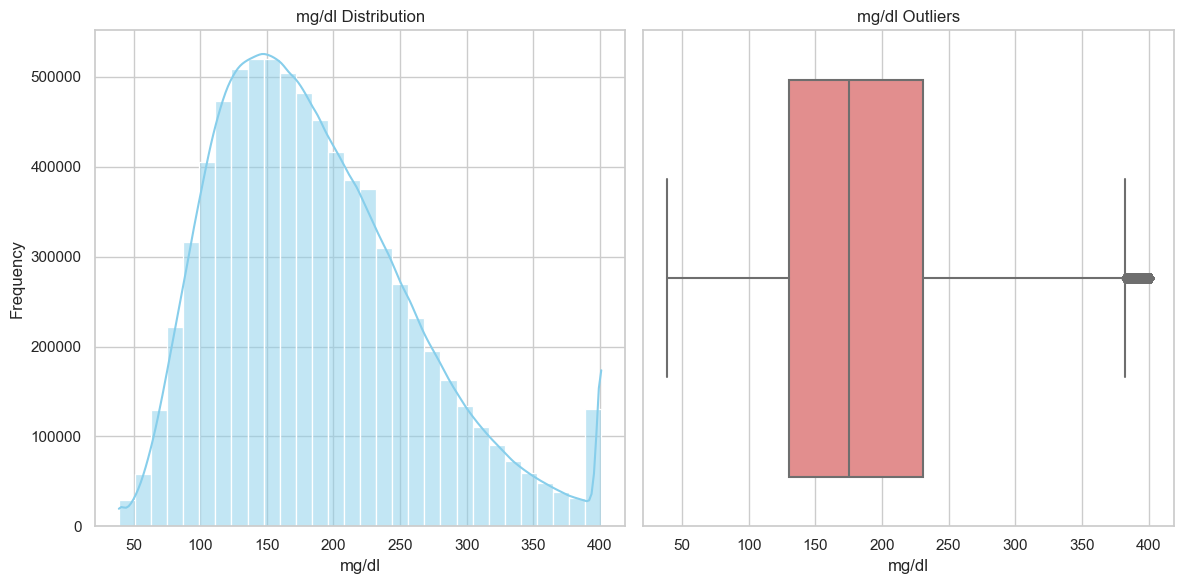

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select variables to plot, excluding 'date' and 'Subject'
variables_to_plot = [col for col in all_data.columns if col not in ['date', 'Subject']]

# Set plot style
sns.set(style="whitegrid")

# Plot each variable's distribution and outliers
for column in variables_to_plot:
    plt.figure(figsize=(12, 6))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(all_data[column], kde=True, bins=30, color='skyblue')
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Boxplot for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(x=all_data[column], color='lightcoral')
    plt.title(f"{column} Outliers")
    plt.xlabel(column)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

This plot shows the distribution and outliers for the glucose. The histogram shows that glucose levels are most frequently concentrated between 100 and 200 mg/dl, with a right-skewed distribution, indicating fewer instances of very high glucose levels. The boxplot shows the range of typical values, with a few high outliers beyond the whiskers, suggesting occasional elevated glucose readings. The data appears to have a primary concentration within a moderate range, with some variability at higher levels.

In [8]:
print("\nSummary Statistics:")
print(all_data.describe())


Summary Statistics:
                                date         mg/dl
count                        7735050  7.680740e+06
mean   2020-06-24 16:08:23.944416256  1.863038e+02
min       2015-12-01 21:01:07.925000  3.896622e+01
25%    2019-08-22 01:07:38.249999872  1.300000e+02
50%              2020-09-16 17:13:01  1.750000e+02
75%              2021-07-17 20:31:13  2.310000e+02
max              2022-06-28 23:59:34  4.010000e+02
std                              NaN  7.417743e+01


### Plan for Handling Missing Values

#### 1. `date` (datetime64[ns])
   - **Missing Count**: 0
   - **Strategy**: No action needed as there are no missing timestamps.

#### 2. `mg/dl` (Blood Glucose Level)
   - **Missing Count**: 54,310
   - **Strategy**: Interpolate missing values linearly, since glucose levels typically change smoothly over time.

#### 3. `Subject` (object)
   - **Missing Count**: 0
   - **Strategy**: No action needed, as it is an identifier with no missing values.

## Impute missing values

In [9]:
# Fill missing values in 'mg/dl' using linear interpolation
all_data['mg/dl'] = all_data['mg/dl'].interpolate(method='linear')

# Show the first few rows and check for any remaining missing values
print(all_data.head())
print("Missing values in 'mg/dl' after interpolation:", all_data['mg/dl'].isnull().sum())

                     date  mg/dl Subject
0 2015-12-01 21:01:07.925  160.0       1
1 2015-12-01 21:06:07.043  161.0       1
2 2015-12-01 21:11:08.277  165.0       1
3 2015-12-01 21:16:08.223  162.0       1
4 2015-12-01 21:21:07.953  163.0       1
Missing values in 'mg/dl' after interpolation: 0


## Outlier detection and Handling

c:\Users\eterp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


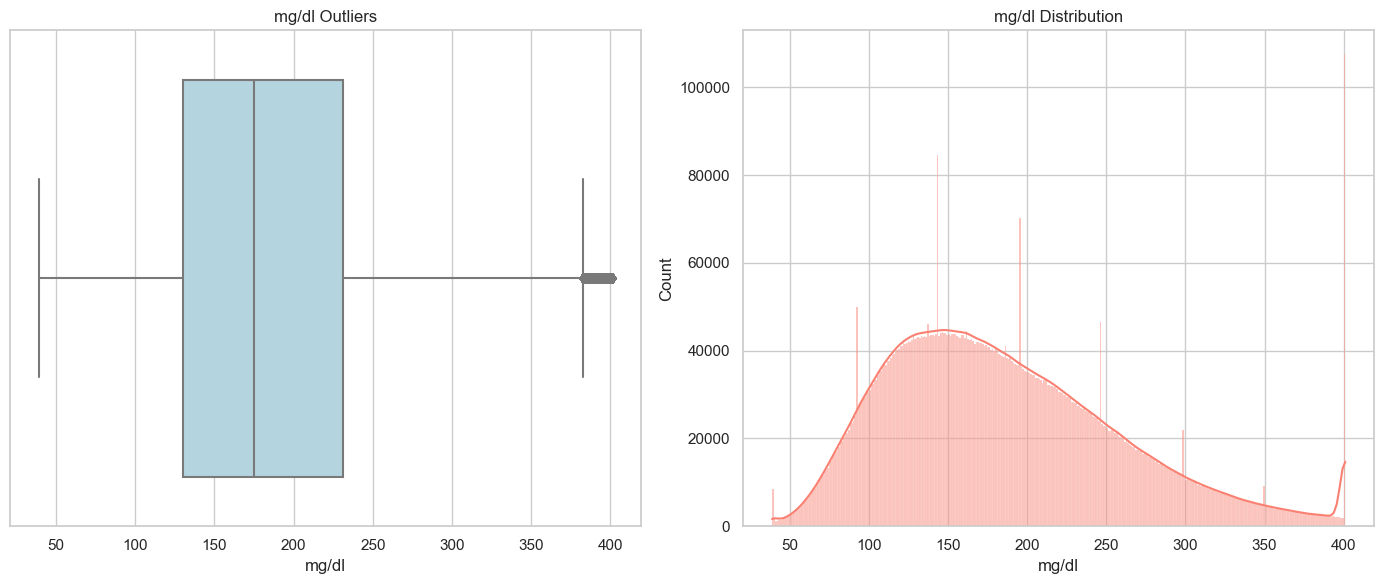

              mg/dl
count  7.735050e+06
mean   1.864156e+02
std    7.399195e+01
min    6.200000e+01
25%    1.300000e+02
50%    1.750000e+02
75%    2.310000e+02
max    4.010000e+02


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables to analyze, excluding 'date' and 'Subject'
variables_to_analyze = [col for col in all_data.columns if col not in ['date', 'Subject']]

# Plot boxplot and distribution for each variable
for column in variables_to_analyze:
    plt.figure(figsize=(14, 6))
    
    # Boxplot for outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=all_data, x=column, color='lightblue')
    plt.title(f"{column} Outliers")
    
    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(all_data[column], kde=True, color='salmon')
    plt.title(f"{column} Distribution")
    
    plt.tight_layout()
    plt.show()

# Cap outliers at 1st and 99th percentiles
for column in variables_to_analyze:
    lower_cap = all_data[column].quantile(0.01)
    upper_cap = all_data[column].quantile(0.99)
    all_data[column] = all_data[column].clip(lower=lower_cap, upper=upper_cap)

# Check summary statistics
print(all_data[variables_to_analyze].describe())

# SubjectDemographics Dataset

In [11]:
import pandas as pd

file_path = os.path.join('..', 'glucosedataset', 'SubjectDemographics.xlsx')

# Load the Excel
df_subject_demographics = pd.read_excel(file_path)

# Display the first few rows
df_subject_demographics.head()


,Subject,Age,Gender,Race,Hemoglobin A1C
0,1,20,Male,White/Caucasian,6.3
1,2,21,Female,White/Caucasian,9.9
2,3,19,Female,White/Caucasian,8.3
3,4,26,Female,White/Caucasian,7.2
4,5,28,Male,White/Caucasian,8.6


This dataset contains demographic and health information for different subjects:

* Subject: Unique identifier for each individual.
* Age: Age of the subject in years.
* Gender: Gender of the subject (Male or Female).
* Race: Racial background, with all entries currently marked as White/Caucasian.
* Hemoglobin A1C: Hemoglobin A1C level, a measure of blood sugar control over the past 2-3 months, which can help assess diabetes management.

This data will be useed for understanding the relationship between glucose and Hemoglobin A1C.

### Show data types and missing values

In [12]:
# Create a DataFrame just to show data types and missing values
data_info = pd.DataFrame({
    'Data Type': df_subject_demographics.dtypes,
    'Missing Values': df_subject_demographics.isnull().sum()
})

# Show data types and missing values
print(data_info)

               Data Type  Missing Values
Subject            int64               0
Age               object               6
Gender            object               8
Race              object               9
Hemoglobin A1C   float64              11


The dataset includes five columns: Subject (int64) has no missing values, while Age (object), Gender (object), Race (object), and Hemoglobin A1C (float64) have 6, 8, 9, and 11 missing values, respectively.

Text(0, 0.5, 'Number of subjects')

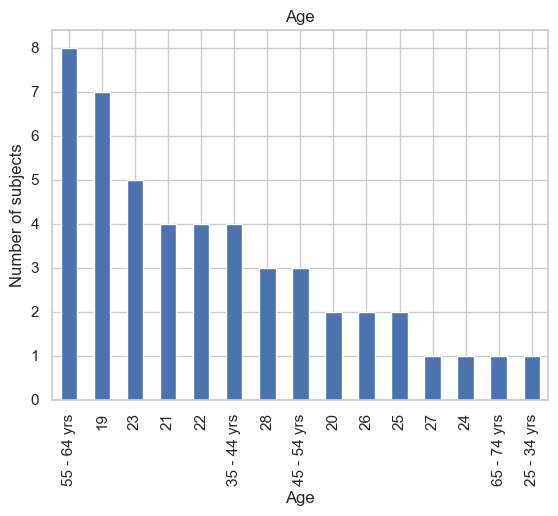

In [13]:
fig = df_subject_demographics['Age'].value_counts().plot.bar()
fig.set_title('Age')
fig.set_ylabel('Number of subjects')

This bar chart shows largest group is in the 55-64 years range. Age groups from 35 to 74 are represented, but with fewer individuals in each subsequent range, indicating an uneven age distribution with a concentration of older adults.

Text(0, 0.5, 'Number of subjects')

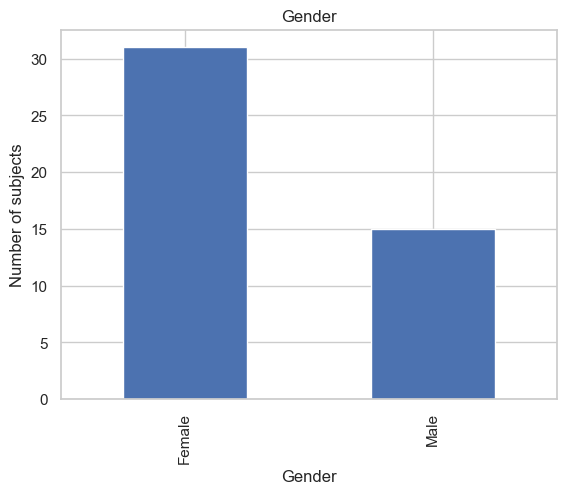

In [14]:
fig = df_subject_demographics['Gender'].value_counts().plot.bar()
fig.set_title('Gender')
fig.set_ylabel('Number of subjects')

The chart shows a higher number of female subjects compared to male subjects in the dataset.

Text(0, 0.5, 'Number of subjects')

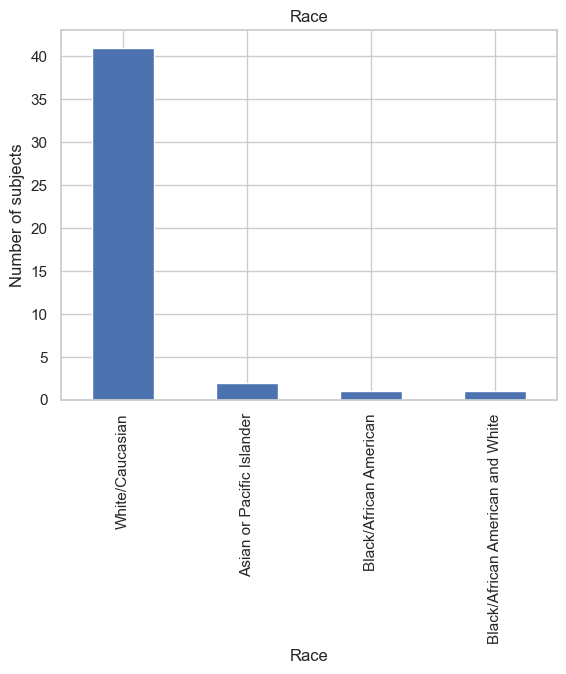

In [15]:
fig = df_subject_demographics['Race'].value_counts().plot.bar()
fig.set_title('Race')
fig.set_ylabel('Number of subjects')

The chart indicates that the majority of subjects are White/Caucasian, with a small representation from other racial groups, including Asian or Pacific Islander, Black/African American, and mixed Black/African American and White.

Text(0, 0.5, 'Number of subjects')

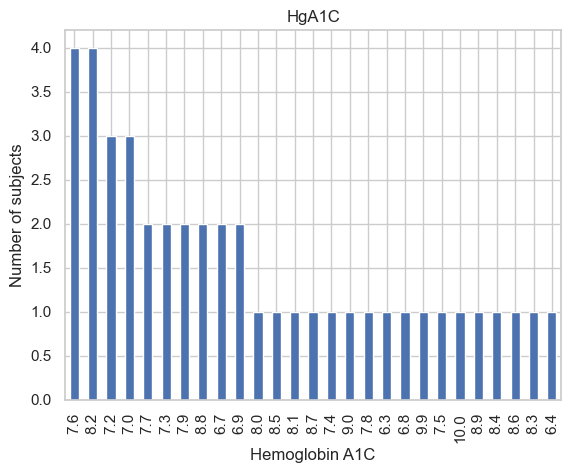

In [16]:
fig = df_subject_demographics['Hemoglobin A1C'].value_counts().plot.bar()
fig.set_title('HgA1C')
fig.set_ylabel('Number of subjects')

The distribution of Hemoglobin A1C levels shows that most common levels are around 7.6 and 8.2, with fewer subjects at higher or lower values. This distribution suggests a concentration of subjects with moderate A1C levels, with a few outliers at both lower and higher ends, indicating varied glucose control among the subjects.

## Merging datasets

The all_data DataFrame will be merged with df_subject_demographics by the Subject column, adding the Hemoglobin A1C values from df_subject_demographics to all_data. This allows us to link each subject's A1C measurements with their time-series glucose (mg/dl) data. Even if there are missing Hemoglobin A1C values for some subjects, the existing A1C data will serve as labeled data, enabling us to train a predictive model to estimate A1C for subjects with missing values. This approach leverages available data to potentially expand insights to those without recorded A1C values.

In [17]:
# Ensure 'Subject' column is the same type in both DataFrames
all_data['Subject'] = all_data['Subject'].astype(str)
df_subject_demographics['Subject'] = df_subject_demographics['Subject'].astype(str)

# Merge 'all_data' with 'df_subject_demographics' on 'Subject'
all_data = all_data.merge(df_subject_demographics[['Subject', 'Hemoglobin A1C']], on='Subject', how='left')

# Show first few rows to confirm the merge
print(all_data.head())


                     date  mg/dl Subject  Hemoglobin A1C
0 2015-12-01 21:01:07.925  160.0       1             6.3
1 2015-12-01 21:06:07.043  161.0       1             6.3
2 2015-12-01 21:11:08.277  165.0       1             6.3
3 2015-12-01 21:16:08.223  162.0       1             6.3
4 2015-12-01 21:21:07.953  163.0       1             6.3


In [18]:
# Export the merged DataFrame to a CSV file
all_data.to_csv('merged_diatrend_data.csv', index=False)